In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal

### Sample uncorrelated 1D GPs

In [7]:
lambdaGP = 2.  # spatial scale of the GP

NP = 100  # number of points defining to discretize the independent variable
varMin, varMax = -5., 5.  # range of the independent variable
varRange = np.linspace(varMin, varMax, NP)

# build kernel discretization
C0 = np.zeros((NP, NP))
for i in range(NP):
    for j in range(NP):
        C0[i, j] = np.exp(-1 / lambdaGP**2 * (varRange[i] - varRange[j])**2)

# sample
X0 = multivariate_normal(np.zeros(NP), C0, 100)

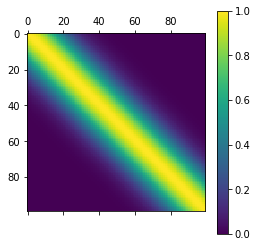

In [8]:
plt.matshow(C0)
plt.colorbar()
plt.show()

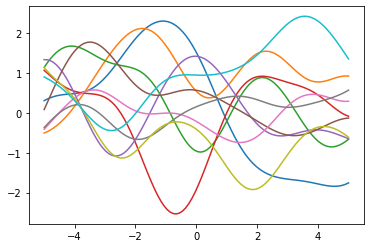

In [9]:
[plt.plot(varRange, X0[mu, :]) for mu in range(10)]
plt.show()

### Sample correlated 1D GPs  

In [21]:
B = 10  # number of correlated samples
lambdaGP = 2.  # spatial scale of the GP
tauGP = 0.6  # correlation across plants

NP = 100  # number of points defining to discretize the independent variable
varMin, varMax = -5., 5.  # range of the independent variable
varRange = np.linspace(varMin, varMax, NP)

# build kernel discretization
C0 = np.zeros((NP, NP))
for i in range(NP):
    for j in range(NP):
        C0[i, j] = np.exp(-1 / lambdaGP**2 * (varRange[i] - varRange[j])**2)

# combine kernels into a multi-process covariance matrix
C = np.zeros((NP * B, NP * B))
for b in range(B):
    for b2 in range(B):
        if b == b2:
            C[b * NP:(b + 1) * NP, b * NP:(b + 1) * NP] = C0[:, :]
        else:
            C[b * NP:(b + 1) * NP, b2 * NP:(b2 + 1) * NP] = tauGP * C0[:, :]
# sample the multi-process and reshape into multiple GP samples
X = multivariate_normal(np.zeros(NP * B), C, 1).reshape(B, NP)

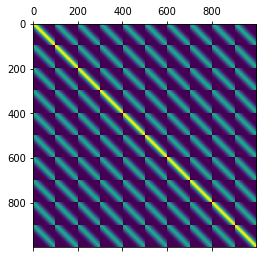

In [22]:
plt.matshow(C)
plt.show()

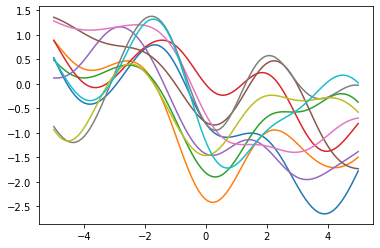

In [23]:
[plt.plot(varRange, X[b, :]) for b in range(B)]
plt.show()

In [39]:
np.interp(5.2, varRange, X[0, :])

-1.7811862658088229

(1.99, 2.01)

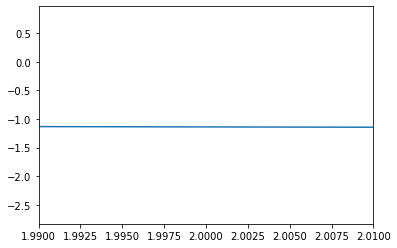

In [30]:
plt.plot(varRange, X[0, :])
plt.xlim([1.99, 2.01])

### Sample multi-D correlated GPs 

This can be very computationally expensive!

In [9]:
B = 2  # number of correlated samples
tauGP = 0.7  # correlation across plantslambdaGP = 4.
NP = 50
var1Range = np.linspace(-5, 5, NP)
var2Range = np.linspace(-5, 5, NP)
points = np.concatenate([np.array([x, y])[:, None] for x in var1Range for y in var2Range], axis=1)
NGP = points.shape[1]

C0 = np.zeros((NGP, NGP))
for i in range(NGP):
    for j in range(NGP):
        C0[i, j] = np.exp(-1 / lambdaGP**2 * sum((points[:, i] - points[:, j])**2))

C = np.zeros((NGP * B, NGP * B))
for b in range(B):
    for b2 in range(B):
        if b == b2:
            C[b * NGP:(b + 1) * NGP, b * NGP:(b + 1) * NGP] = C0[:, :]
        else:
            C[b * NGP:(b + 1) * NGP, b2 * NGP:(b2 + 1) * NGP] = tauGP * C0[:, :]
            
X = multivariate_normal(np.zeros(NGP * B), C, 1).reshape(B, NGP)

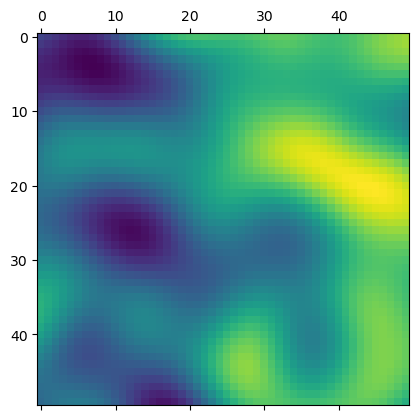

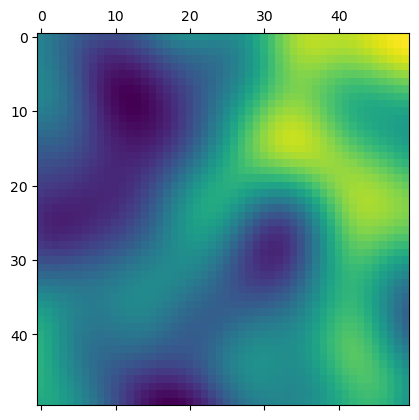

In [13]:
[plt.matshow(X[b, :].reshape(NP, NP)) for b in range(B)]
plt.show()

In [5]:
help(np.interp)

Help on function interp in module numpy:

interp(x, xp, fp, left=None, right=None, period=None)
    One-dimensional linear interpolation.
    
    Returns the one-dimensional piecewise linear interpolant to a function
    with given discrete data points (`xp`, `fp`), evaluated at `x`.
    
    Parameters
    ----------
    x : array_like
        The x-coordinates at which to evaluate the interpolated values.
    
    xp : 1-D sequence of floats
        The x-coordinates of the data points, must be increasing if argument
        `period` is not specified. Otherwise, `xp` is internally sorted after
        normalizing the periodic boundaries with ``xp = xp % period``.
    
    fp : 1-D sequence of float or complex
        The y-coordinates of the data points, same length as `xp`.
    
    left : optional float or complex corresponding to fp
        Value to return for `x < xp[0]`, default is `fp[0]`.
    
    right : optional float or complex corresponding to fp
        Value to return f